<a href="https://colab.research.google.com/github/bcmin1018/NLP/blob/main/MRC/QA_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown --id 1n74_kfEjrjkHYsUr1CugGgzxL7ns28gV
!gdown --id 1lMszENg5tEyeTnm2XR0X0876HKltWlLk
!gdown --id 14FUap4xX_XMfq1T4RS3nJXeomQiDm4Nu
!gdown --id 1ygUD3YA9goXs20h6gvmrxkBjMzJlCQjR
!unzip -qq "./train.zip"
!unzip -qq "./test.zip"

train_data = "/content/train.json"
valid_data = "/content/train.json"
test_data = "/content/test.json"
submission = "/content/sample_submission.csv"

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1n74_kfEjrjkHYsUr1CugGgzxL7ns28gV
To: /content/train.zip
100% 17.4M/17.4M [00:00<00:00, 67.0MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1lMszENg5tEyeTnm2XR0X0876HKltWlLk
To: /content/test.zip
100% 844k/844k [00:00<00:00, 84.7MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://dr

In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 8.0 MB/s 
     |████████████████████████████████| 86 kB 5.3 MB/s 
     |████████████████████████████████| 6.6 MB 33.1 MB/s 
     |████████████████████████████████| 596 kB 59.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [16]:
from tokenizers import BertWordPieceTokenizer
from transformers import BertTokenizer, TFBertModel
import matplotlib.pyplot as plt
import numpy as np
import json
import pprint
import wget
import os

In [4]:
train_data = json.load(open("/content/train.json", 'r', encoding='utf8'))
pprint.pprint(train_data['data'][0])

{'content_id': 'CNTS_4740509086',
 'paragraphs': [{'context': '이 글에서는 제안한 기술경쟁력 평가 방법의 특징은 두 가지로 요약된다. 첫째, 현재의 '
                            '경쟁력보다는 미래의 경쟁력을 평가하도록 평가의 대상을 확대해야 한다. 지금까지의 경쟁력 '
                            '평가가 현위치를 중심으로 한 것이었다면, 앞으로의 대안은 과정과 경로를 중시하는 것이 '
                            '되어야 한다는 것이다. 사실 지식정보화사회에서 가진 것이란 허망한 것이다. 현재의 '
                            '기술수준이 높더라고, 이를 끊임없이 개량하고 새로운 기술을 발전시킬 수 있는 능력이 '
                            '없다면 미래의 전망은 어둡다. 기술이나 정보는 실물 자산보다 진부화율이 매우 높다. '
                            '둘째, 기술경쟁력 평가를 순위를 매기는 작업이 아니라 이를 통하여 장점과 단점을 파악하는 '
                            '과정으로 활용하여야 한다. 순위는 대중적인 흥미는 끌 수 있지만, 그것으로부터 교훈이 '
                            '도출되는 것은 아니다. 기술경쟁력의 평가를 통해서 외국시스템의 장점을 배우고, 한국 '
                            '시스템의 단점을 교정하는 대안이 발견될 수 있다. 경쟁이란 남과 비교하는 것을 의미한다. '
                            '내가 아무리 잘 하더라도 남이 나보다 더 잘 한다면 경쟁에서 진다. 그래서 경쟁은 '
                            '각박하지만, 과학기술은 경쟁을 피할 수 있는 분야가 아니다. 경쟁 상대국을 연구하고, '
                    

In [5]:
documents = []
for d in train_data['data']:
  documents += [p['context'] for p in d['paragraphs']]
  
print('전체 텍스트 수: {}'.format(len(documents)))

전체 텍스트 수: 37329


In [7]:
len_docs = []
for d in documents:
  len_docs.append(len(d.split()))
print('텍스트 최대길이: {}'.format(np.max(len_docs)))
print('텍스트 최소길이: {}'.format(np.min(len_docs)))
print('텍스트 평균 길이: {:.2f}'.format(np.mean(len_docs)))
print('텍스트 길이 표준 편차: {:.2f}'.format(np.std(len_docs)))
print('텍스트 중간 길이: {}'.format(np.median(len_docs)))
print('1사분위 텍스트 길이: {}'.format(np.percentile(len_docs, 25)))
print('3사분위 텍스트 길이: {}'.format(np.percentile(len_docs, 75)))

텍스트 최대길이: 180
텍스트 최소길이: 38
텍스트 평균 길이: 111.88
텍스트 길이 표준 편차: 18.96
텍스트 중간 길이: 111.0
1사분위 텍스트 길이: 98.0
3사분위 텍스트 길이: 126.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f0f69d58a90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0f69d69ad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0f69cfb090>],
 'means': [<matplotlib.lines.Line2D at 0x7f0f69d90c10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0f69d705d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0f69d69050>,
  <matplotlib.lines.Line2D at 0x7f0f69d69590>]}

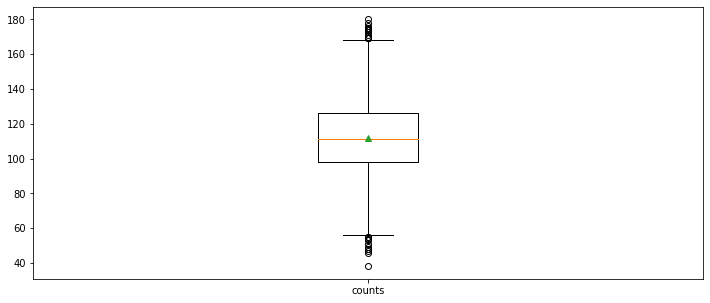

In [8]:
plt.figure(figsize=(12,5))
plt.boxplot([len_docs],
            labels=['counts'],
            showmeans=True)

Text(0, 0.5, 'Probablility')

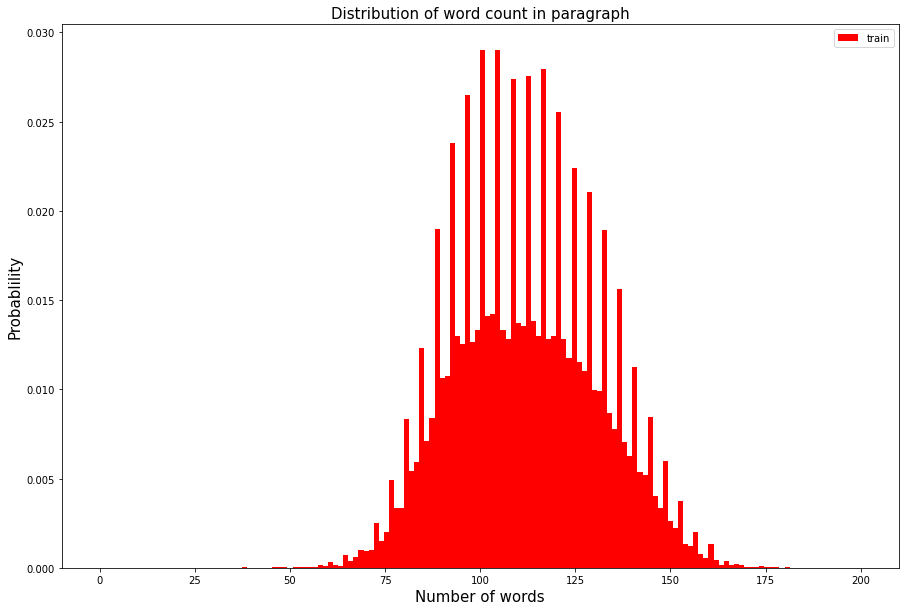

In [9]:
plt.figure(figsize=(15, 10))
plt.hist(len_docs, bins=150, range=[0,200], facecolor='r', density=True, label='train')
plt.title("Distribution of word count in paragraph", fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probablility', fontsize=15)

In [11]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=5ceb2b6e79fd04ff90170719dcfe804b9b6a2b6939b6b6aced6e59b5cb8ec3ee
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [19]:
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', lowercase=False)
save_path = "bert-base-multilingual-cased/"
bert_tokenizer.save_pretrained(save_path)
tokenizer = BertWordPieceTokenizer("bert-base-multilingual-cased/vocab.txt", lowercase=False)

In [20]:
len_bert_tokenized_docs = []
for d in documents:
  len_bert_tokenized_docs.append(
      len(bert_tokenize.encode(d, add_special_tokens=False))
  )

print('텍스트 최대길이: {}'.format(np.max(len_bert_tokenized_docs)))
print('텍스트 최소길이: {}'.format(np.min(len_bert_tokenized_docs)))
print('텍스트 평균 길이: {:.2f}'.format(np.mean(len_bert_tokenized_docs)))
print('텍스트 길이 표준 편차: {:.2f}'.format(np.std(len_bert_tokenized_docs)))
print('텍스트 중간 길이: {}'.format(np.median(len_bert_tokenized_docs)))
print('1사분위 텍스트 길이: {}'.format(np.percentile(len_bert_tokenized_docs, 25)))
print('3사분위 텍스트 길이: {}'.format(np.percentile(len_bert_tokenized_docs, 75)))

텍스트 최대길이: 452
텍스트 최소길이: 131
텍스트 평균 길이: 313.87
텍스트 길이 표준 편차: 47.44
텍스트 중간 길이: 313.0
1사분위 텍스트 길이: 276.0
3사분위 텍스트 길이: 351.0


Text(0, 0.5, 'Probablility')

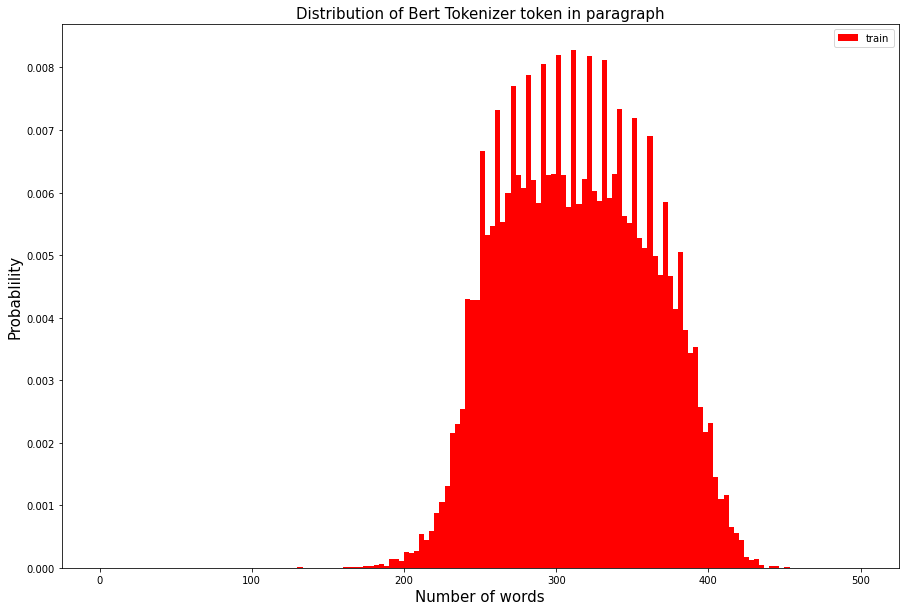

In [23]:
plt.figure(figsize=(15, 10))
plt.hist(len_bert_tokenized_docs, bins=150, range=[0,500], facecolor='r', density=True, label='train')
plt.title("Distribution of Bert Tokenizer token in paragraph", fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probablility', fontsize=15)

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from random import sample

sentences = []
for d in documents:
  sentences += sent_tokenize(d)

print('전체 문장 수: {}'.format(len(sentences)))
sampled_docs = sample(sentences, 20000)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
전체 문장 수: 219044


(-0.5, 799.5, 599.5, -0.5)

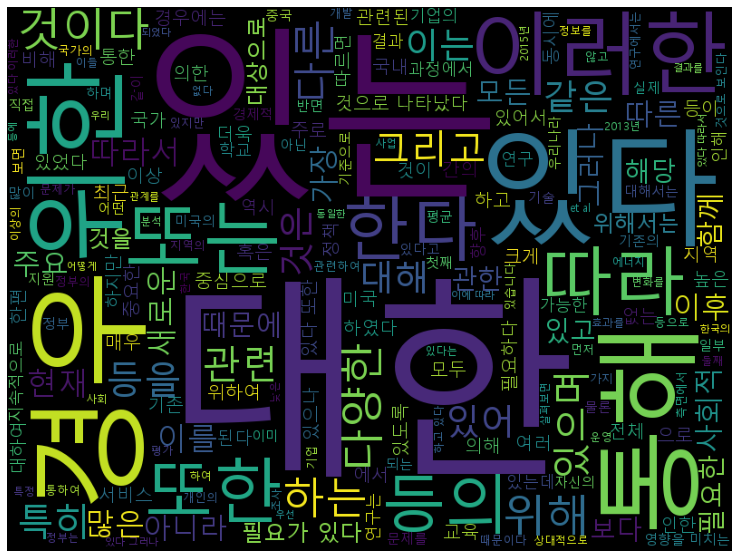

In [ ]:
from wordcloud import WordCloud
font_path = "/content/drive/MyDrive/Colab Notebooks/QA/etc/MALGUN.TTF"
cloud = WordCloud(font_path = font_path, width=800, height=600).generate(" ".join(sampled_docs))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

In [ ]:
!pip install konlpy
from konlpy.tag import Okt
phoneme_tokenizer = Okt()

noun_extracted_docs = list()
for d in sampled_docs:
  noun_extracted_docs += phoneme_tokenizer.nouns(d)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 3.8 MB/s 
     |████████████████████████████████| 453 kB 67.7 MB/s 


(-0.5, 799.5, 599.5, -0.5)

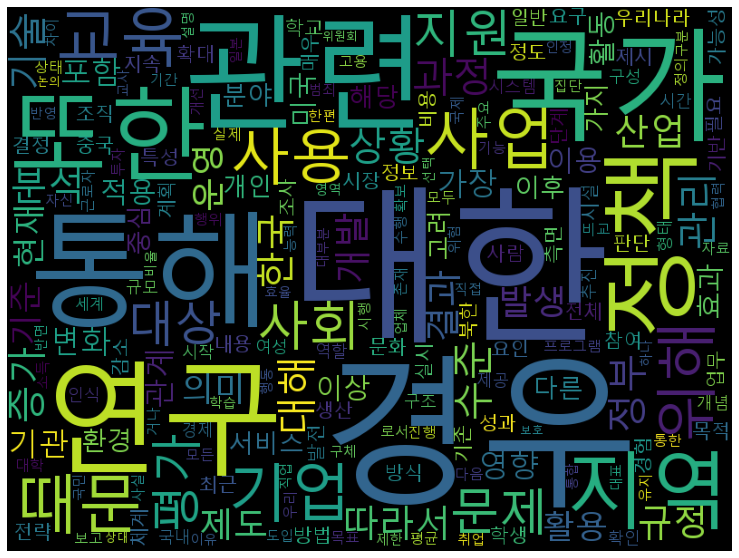

In [ ]:
font_path = "/content/drive/MyDrive/Colab Notebooks/QA/etc/MALGUN.TTF"
cloud = WordCloud(font_path = font_path, width=800, height=600).generate(" ".join(noun_extracted_docs))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

In [24]:
questions = []
for d in train_data['data']:
  qas = [p['qas'] for p in d['paragraphs']]
  for c in qas:
    questions += [q['question'] for q in c]
print('전체 질문 수: {}'.format(len(questions)))


전체 질문 수: 37329


In [25]:
len_qs = []
for q in questions:
  len_qs.append(
      len(q.split()))

print('텍스트 최대길이: {}'.format(np.max(len_qs)))
print('텍스트 최소길이: {}'.format(np.min(len_qs)))
print('텍스트 평균 길이: {:.2f}'.format(np.mean(len_qs)))
print('텍스트 길이 표준 편차: {:.2f}'.format(np.std(len_qs)))
print('텍스트 중간 길이: {}'.format(np.median(len_qs)))
print('1사분위 텍스트 길이: {}'.format(np.percentile(len_qs, 25)))
print('3사분위 텍스트 길이: {}'.format(np.percentile(len_qs, 75)))

텍스트 최대길이: 56
텍스트 최소길이: 3
텍스트 평균 길이: 10.38
텍스트 길이 표준 편차: 3.53
텍스트 중간 길이: 10.0
1사분위 텍스트 길이: 8.0
3사분위 텍스트 길이: 12.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f2c04a57ad0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2c04a91550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2c04a5d350>],
 'means': [<matplotlib.lines.Line2D at 0x7f2c049f6fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2c04abd4d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2c04a57410>,
  <matplotlib.lines.Line2D at 0x7f2c04a91590>]}

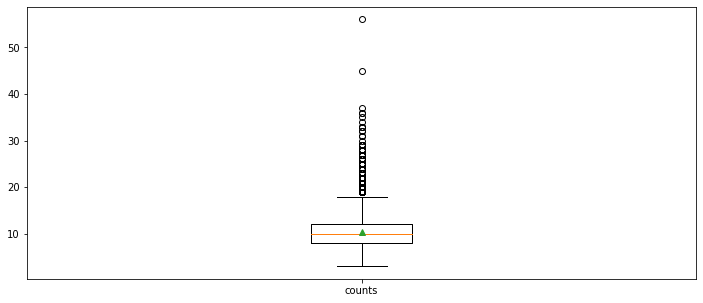

In [ ]:
plt.figure(figsize=(12,5))
plt.boxplot([len_qs],
            labels=['counts'],
            showmeans=True)

In [28]:
len_bert_qs = []
for q in questions:
  len_bert_qs.append(
      len(bert_tokenize.encode(q, add_special_tokens=False))
  )

print('텍스트 최대길이: {}'.format(np.max(len_bert_qs)))
print('텍스트 최소길이: {}'.format(np.min(len_bert_qs)))
print('텍스트 평균 길이: {:.2f}'.format(np.mean(len_bert_qs)))
print('텍스트 길이 표준 편차: {:.2f}'.format(np.std(len_bert_qs)))
print('텍스트 중간 길이: {}'.format(np.median(len_bert_qs)))
print('1사분위 텍스트 길이: {}'.format(np.percentile(len_bert_qs, 25)))
print('3사분위 텍스트 길이: {}'.format(np.percentile(len_bert_qs, 75)))

텍스트 최대길이: 141
텍스트 최소길이: 5
텍스트 평균 길이: 26.87
텍스트 길이 표준 편차: 8.75
텍스트 중간 길이: 26.0
1사분위 텍스트 길이: 21.0
3사분위 텍스트 길이: 31.0
